## Imports

In [1]:
!pip install ultralytics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import torch
from ultralytics import SAM
from datetime import datetime
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import os
import shutil

model_type = "vit_t"
sam_checkpoint = "/content/drive/MyDrive/OCR-SKU/Rough/mobile_sam.pt"

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## Code

In [4]:
model = SAM('mobile_sam.pt')

In [ ]:
#!unzip '/content/drive/MyDrive/OCR-SKU/Image_Dataset/2.zip'

In [58]:
def check(x,y,w,h):
    if 100*(10**5)>w*h>8*(10**4):
        return True
    return False

In [59]:
def display(IMAGE_PATH, points):
    image = cv2.imread(IMAGE_PATH)
    shape = image.shape
    print(image.shape)
    pred = model.predict(IMAGE_PATH, labels=[1], points = points)
    mask = np.array(pred[0].masks.data.cpu()[0,:,:])+np.array(pred[0].masks.data.cpu()[1,:,:])
    # Find contours in the mask
    contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.circle(image, points[0], 7, (0, 0, 255), -1)
    cv2.circle(image, points[1], 7, (0, 0, 255), -1)

    bbox = ''
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        #print(w*h)
        if check(x,y,w,h):
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 3)
            if len(bbox)==0:
                bbox = f'0 {(x+w/2)/shape[1]} {(y+h/2)/shape[0]} {w/shape[1]} {h/shape[0]}'
            else:
                bbox += f'\n0 {(x+w/2)/shape[1]} {(y+h/2)/shape[0]} {w/shape[1]} {h/shape[0]}'

    #plt.imshow(image)
    #plt.show()
    cv2_imshow(image)
    return bbox

In [103]:
points = np.array([[910, 700], [1080, 810]])
path = '/content/drive/MyDrive/OCR-SKU/Image_Dataset/Frames/'
IMAGE_PATH = path+sorted(os.listdir(path))[0]
print(IMAGE_PATH)
text = display(IMAGE_PATH, points)
print(text)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
text = ''

In [104]:
destination_folder = '/content/drive/MyDrive/OCR-SKU/Image_Dataset/bbox_dataset/Images6/'
cnt = len(os.listdir(destination_folder))+606

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.mkdir(destination_folder)

# Move the image file to the destination folder
shutil.move(IMAGE_PATH, destination_folder+f'{cnt+1}.jpg')

file_path = '/content/drive/MyDrive/OCR-SKU/Image_Dataset/bbox_dataset/Labels6/'

# Open the file in write mode
with open(file_path+f'{cnt+1}.txt', 'w') as file:
    file.write(text)


image 1/1 /content/drive/MyDrive/OCR-SKU/Image_Dataset/Frames/frame0046.jpg: 1024x1024 3616.8ms
Speed: 13.7ms preprocess, 3616.8ms inference, 111.3ms postprocess per image at shape (1, 3, 1024, 1024)


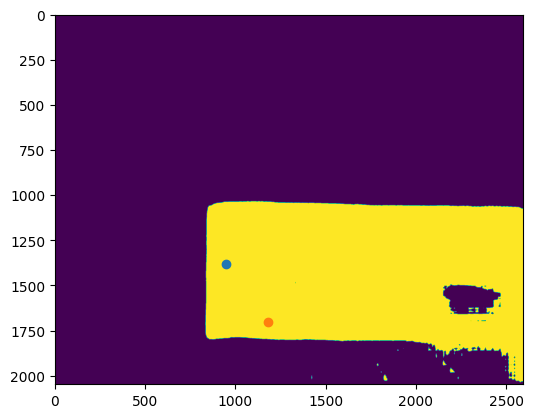

In [75]:
pred = model.predict(IMAGE_PATH, labels=[1], points = points)
mask = np.array(pred[0].masks.data.cpu()[0,:,:])+np.array(pred[0].masks.data.cpu()[1,:,:])

plt.imshow(mask)
plt.scatter(points[0][0],points[0][1])
plt.scatter(points[1][0], points[1][1])

In [ ]:
cnt

148